# Proyecto 03 - Procesamiento del Lenguaje Natural

## Dataset: Big Data Reviews

**Este dataset resulta de un trabajo de <a href="https://uba.academia.edu/gastonbecerra/Papers">Gastón Becerra</a>, interesado en colectar valoraciones acerca de tecnologías emergentes en el espacio de publicaciones online en Argentina. En este caso en particular, trabajaremos sobre un dataset que contiene exclusivamente valoraciones textuales respecto a la noción de Big Data.**

El siguiente notebok, exploraremos la posibilidad de construir un algoritmo de clasificación que pueda, haciendo uso de todo lo aprendido en el curso, etiquetar correctamente estas valoraciones. Para ello haremos uso de técnicas de NLP y modelado para construir un algoritmo de análisis de sentimientos. 

El dataset puede ser encontrado en el siguiente <a href="https://drive.google.com/file/d/14HsqdkcVn_Z0yC8odb1fwwJVnMfMPZBn/view?usp=sharing"> sitio</a>. 

El dataset ha sido construido en diversas fases: primero a través de un proceso de scrapping a sitios online de importancia en Argentina; y, luego, a través de la construcción de una interfaz web donde utilizamos **Angular JS** y una conexión a **Firebase** para poder clasificar la muestra inicial a través de allegados y conocidos.

Pueden dar un vistazo a la interfaz de clasificación <a href="https://fraser6-d10a4.web.app/"> aquí</a>. 

<hr></hr>

# Exploración de datos y Procesamiento del Lenguaje Natural

Dedícale un buen tiempo a hacer un Análisis Exploratorio de Datos. Considera que hasta que no hayas aplicado las herramientas de Procesamiento del Lenguaje Natural vistas, será difícil completar este análisis. Elige preguntas que creas que puedas responder con este dataset. Por ejemplo, ¿qué palabras están asociadas a calificaciones positivas y qué palabras a calificaciones negativas?

In [79]:
# Importamos librerías
import itertools

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import nltk

#Esto sirve para configurar NLTK. La primera vez puede tardar un poco
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\juanp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\juanp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [80]:
# Importamos dataset
dataset = pd.read_csv('oraciones_entrenar.csv')
dataset.head()

,estado,id,oracion
0,positivo,0,' ( el bigdata ) es una forma que guizhou usó ...
1,positivo,4,"' a la variedad , volumen y veracidad de infor..."
2,positivo,5,"' a la variedad , volumen y veracidad de infor..."
3,positivo,6,' a medida que florezca la industria nacional ...
4,positivo,10,"' además , esta información también puede ser ..."


<div style="padding: 10px 10px 10px 10px; background-color:lightgrey; text-align:left">
    <h4>Observaciones</h4>
    <p>Como se obserba, el dataset es bien simple: un estado (etiqueta de valoración binaria), y la oración; <i>y, X</i>. </p>
    <p>Todas las oraciones tienen como atributo referirse de una u otra manera a la noción de <strong>big data</strong></p>
    <p>Luego de haber sido colectadas a través de scrapping, todas las oraciones han sido clasificadas por hurmanos ayudando en este proceso de investigación.</p>
    <p>La columna <i>id</i>, que muestra un desfase con index, pone en envidencia que existe una muestra mayor de comentarios que aún no han sido clasificados.</p>
    <p>A lo largo de este notebook trataremos de construir un modelo de clasificación de sentimientos para los aún no clasificados</p>
</div>

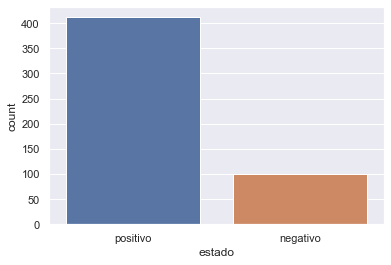

In [81]:
sns.countplot(dataset.estado)
plt.show()

<div style="padding: 10px 10px 10px 10px; background-color:tomato; text-align:center">
    <h4 style="text-align:left">Observaciones</h4>
    <p style="text-align:left">Se observa lo que será un problema importante: el desbalance de muestras clasificadas en una relación de 4 : 1 (4 + : 4 -).</p>
    <p style="text-align:left">Se exolorarán soluciones a este problema previo al momento de modelización (Oversampling methods)</p>
    <div style="text-align:left">
        <h4> Pasos siguientes</h4>
        <ul>
        <ol> Exploración de comentarios + y - </ol>
        <ol> Establecimiento de hipótesis </ol>
        <ol> Normalización </ol>
            </ul>
    </div>
</div>

## Exploración de comentarios negativos

In [82]:
dataset_negativo = dataset[dataset.estado == 'negativo']
dataset_positivo = dataset[dataset.estado == 'positivo']

In [83]:
print('Shape negativos => ', dataset_negativo.shape, '\nShape positivos => ',  dataset_positivo.shape)

Shape negativos =>  (99, 3) 
Shape positivos =>  (412, 3)


In [84]:
stopwords = nltk.corpus.stopwords.words('spanish')
stopwords = [palabra for palabra in stopwords if 'not' not in palabra]
review_negativas = []
for i in range(dataset_negativo.shape[0]):
    review = dataset_negativo.iloc[i].oracion
    review = nltk.tokenize.RegexpTokenizer("[\w]+").tokenize(review)
    review = [string.lower() for string in review]
    review = [word for word in review if word not in stopwords]
    
    review_negativas.append(review)

In [85]:
stopwords = nltk.corpus.stopwords.words('spanish')
stopwords = [palabra for palabra in stopwords if 'not' not in palabra]
review_positivas = []
for i in range(dataset_positivo.shape[0]):
    review = dataset_positivo.iloc[i].oracion
    review = nltk.tokenize.RegexpTokenizer("[\w]+").tokenize(review)
    review = [string.lower() for string in review]
    review = [word for word in review if word not in stopwords]
    
    review_positivas.append(review)

In [86]:
review_negativas = list(itertools.chain(*review_negativas))
review_positivas = list(itertools.chain(*review_positivas))

In [87]:
freq_negativas = nltk.FreqDist(review_negativas)
freq_negativas

FreqDist({'bigdata': 102, 'datos': 43, 'información': 21, 'puede': 12, 'uso': 10, 'si': 10, 'hacer': 9, 'empresas': 9, 'personales': 8, 'salud': 8, ...})

In [88]:
freq_positivas = nltk.FreqDist(review_positivas)
freq_positivas

FreqDist({'bigdata': 433, 'datos': 134, 'información': 69, 'análisis': 48, 'uso': 38, 'grandes': 37, 'tecnología': 35, 'tecnologías': 28, 'clientes': 28, 'inteligencia_artificial': 28, ...})

In [89]:
# Distribución de vocabulario negativo
df_negativas = pd.DataFrame(list(freq_negativas.items()), columns = ["Word","Frequency"])
print('----------REVIEWS NEGATIVAS----------')
df_negativas.sort_values('Frequency',ascending=False, inplace = True)
df_negativas.head(10)

----------REVIEWS NEGATIVAS----------


,Word,Frequency
3,bigdata,102
22,datos,43
5,información,21
68,puede,12
96,si,10
52,uso,10
69,hacer,9
94,empresas,9
169,personales,8
253,salud,8


In [90]:
# Distribución de vocabulario positivo
df_positivas = pd.DataFrame(list(freq_positivas.items()), columns = ["Word","Frequency"])
print('----------REVIES POSITIVAS---------------')
df_positivas.sort_values('Frequency',ascending=False, inplace = True)
df_positivas.head(10)

----------REVIES POSITIVAS---------------


,Word,Frequency
0,bigdata,433
80,datos,134
9,información,69
15,análisis,48
188,uso,38
293,grandes,37
149,tecnología,35
422,inteligencia_artificial,28
54,tecnologías,28
386,clientes,28


<hr/>

# Hipótesis / Problema

<div style="padding: 10px 10px 10px 10px; background-color:tomato; text-align:center">
<h4 style="text-align:left">Observaciones</h4>
    <div style="text-align:left">
<p style="text-align:left">Se observan 2 grandes problemas: </p>
    <ul>
        <li>Por un lado, como observamos antes, tenemos un desbalance importante entre las muestras clasificadas como positivas y negativas.</li>
        <li>Por el otro, como puede observase en los listados de distribución y en los gráficos aquí arriba, el problema anterior se agucede en la medida en la que reconocemos que el vocabulario dominante en ambas clasificaciones pareciera ser muy parecido. </li>
    </ul>
    
Puede suponerse que ambos problemas redunden en lo que puede plantearse aquí como un proyecto/hipotesis interesantes: <br>
    <p>Dado el desbalance de muestra y la similitud de vocabulario,<strong>¿Podremos construir un modelo de clasificación eficiente? </strong></p>
    </div>
</div>

# Normalización

## `Normalización y lemmatización con spacy`

In [91]:
# Importamos las librerías necesarias para el proceso
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
#from sklearn.feature_extraction.stop_words import SPANISH_STOP_WORDS
from sklearn.metrics import accuracy_score
from nltk.corpus import stopwords
import string
import re
import spacy
# spacy.load('en')
from spacy.lang.es import Spanish
parser = Spanish()

In [92]:
import spacy
nlp = spacy.load("es_core_news_sm")

#### `Funciones de normalizado y lemmatizado`

In [93]:
# Función para el procesamiento-normalización de los tokens
import re

def preprocess(text):
    new_text = re.sub('<.*?>', '', text)   # remove HTML tags
    #new_text = re.sub("[^a-zA-Z]"," ",str(x))
    new_text = re.sub(r'[^\w\s]', '', new_text) # remove punc.
    new_text = re.sub(r'\d+','',new_text)# remove numbers
    new_text = new_text.lower() # lower case, .upper() for upper
    new_text = re.sub(' +', ' ', new_text) # remove multiple spaces
    return new_text

In [94]:
# Función para el lemmatizado
def lemmatizer(text):
    doc = nlp(text)
    return ' '.join([word.lemma_ for word in doc])

In [95]:
# Creamos un nuevo dataset para no joder la cosa
df = dataset

In [96]:
# Creamos una nueva columna con el texto pre-procesados
df['review_clean'] = df['oracion'].apply(lambda x : preprocess(x))

In [97]:
df.head(1)

,estado,id,oracion,review_clean
0,positivo,0,' ( el bigdata ) es una forma que guizhou usó ...,el bigdata es una forma que guizhou usó para ...


In [98]:
# Creamos una nueva columna para la lemmatización sobre el texto recientemente pre-procesado
df['review_lemm'] = df['review_clean'].apply(lambda x : lemmatizer(x))

In [99]:
stopwords = nltk.corpus.stopwords.words('spanish')
stopwords

['de',
 'la',
 'que',
 'el',
 'en',
 'y',
 'a',
 'los',
 'del',
 'se',
 'las',
 'por',
 'un',
 'para',
 'con',
 'no',
 'una',
 'su',
 'al',
 'lo',
 'como',
 'más',
 'pero',
 'sus',
 'le',
 'ya',
 'o',
 'este',
 'sí',
 'porque',
 'esta',
 'entre',
 'cuando',
 'muy',
 'sin',
 'sobre',
 'también',
 'me',
 'hasta',
 'hay',
 'donde',
 'quien',
 'desde',
 'todo',
 'nos',
 'durante',
 'todos',
 'uno',
 'les',
 'ni',
 'contra',
 'otros',
 'ese',
 'eso',
 'ante',
 'ellos',
 'e',
 'esto',
 'mí',
 'antes',
 'algunos',
 'qué',
 'unos',
 'yo',
 'otro',
 'otras',
 'otra',
 'él',
 'tanto',
 'esa',
 'estos',
 'mucho',
 'quienes',
 'nada',
 'muchos',
 'cual',
 'poco',
 'ella',
 'estar',
 'estas',
 'algunas',
 'algo',
 'nosotros',
 'mi',
 'mis',
 'tú',
 'te',
 'ti',
 'tu',
 'tus',
 'ellas',
 'nosotras',
 'vosotros',
 'vosotras',
 'os',
 'mío',
 'mía',
 'míos',
 'mías',
 'tuyo',
 'tuya',
 'tuyos',
 'tuyas',
 'suyo',
 'suya',
 'suyos',
 'suyas',
 'nuestro',
 'nuestra',
 'nuestros',
 'nuestras',
 'vuestro'

In [100]:
df['review_lemm'] = df['review_lemm'].apply(     lambda x: ' '.join([word for word in x.split() if word not in stopwords])     )

In [101]:
# Visualizamos el dataframe resultante
df.head()

,estado,id,oracion,review_clean,review_lemm
0,positivo,0,' ( el bigdata ) es una forma que guizhou usó ...,el bigdata es una forma que guizhou usó para ...,bigdata ser forma guizhou usar bajar pobreza
1,positivo,4,"' a la variedad , volumen y veracidad de infor...",a la variedad volumen y veracidad de informac...,variedad volumen veracidad información proveer...
2,positivo,5,"' a la variedad , volumen y veracidad de infor...",a la variedad volumen y veracidad de informac...,variedad volumen veracidad información proveer...
3,positivo,6,' a medida que florezca la industria nacional ...,a medida que florezca la industria nacional d...,medida florecer industria nacional internet co...
4,positivo,10,"' además , esta información también puede ser ...",además esta información también puede ser de ...,además información poder ser utilidad estudio ...


### `Vectorizado`

In [112]:
# Importamos librerías y creamos vectorizador
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
spacy_vec = CountVectorizer(stop_words=stopwords.words('spanish'), analyzer='word', max_features=300) # Importante determinar un número óptimo de max_features para optimizar rendimiento computacional 
#spacy_vec = CountVectorizer(stop_words=stopwords.words('spanish'), analyzer='word', max_features=300) # Importante determinar un número óptimo de max_features para optimizar rendimiento computacional 

In [113]:
# Transformamos los datos en bolsa de palabras
count_data = spacy_vec.fit(df['review_lemm'])
bag_of_words = spacy_vec.transform(df['review_lemm'])
count_tokens = spacy_vec.get_feature_names()

In [114]:
# Imprimimos las features
print("Atributos:\n{}".format(spacy_vec.get_feature_names()))

Atributos:
['abrir', 'acceso', 'acuerdo', 'adecuado', 'además', 'afirmar', 'agregar', 'agricultura', 'agro', 'ahora', 'algoritmo', 'alguno', 'allí', 'almacenamiento', 'analizar', 'analytic', 'análisis', 'aplicación', 'aplicar', 'aprovechar', 'apuntar', 'argentina', 'argentino', 'artificial', 'asegurar', 'aspecto', 'así', 'automatización', 'ayudar', 'año', 'basado', 'base', 'beneficio', 'bigdata', 'bigdatar', 'bigdato', 'buen', 'buscar', 'búsqueda', 'cada', 'cambio', 'campaña', 'campo', 'cantidad', 'capacidad', 'caso', 'china', 'chino', 'ciencia', 'científico', 'cierto', 'ciudad', 'clave', 'cliente', 'comercial', 'compañía', 'comportamiento', 'comunicación', 'concepto', 'conclusión', 'conjunto', 'conocer', 'conocido', 'conocimiento', 'consumidor', 'consumo', 'contar', 'convertir', 'cosa', 'costo', 'crear', 'crecer', 'crecimiento', 'creer', 'cuenta', 'cuál', 'cómo', 'dar', 'datar', 'dato', 'deber', 'decir', 'decisión', 'dejar', 'dentro', 'desafío', 'desarrollar', 'desarrollo', 'destacar'

In [115]:
# Creamos un dataset para visualizar 
df_countvect = pd.DataFrame(data = bag_of_words.toarray(), columns = count_tokens)

In [116]:
# Visualizamos
df_countvect.head()

,abrir,acceso,acuerdo,adecuado,además,afirmar,agregar,agricultura,agro,ahora,...,velocidad,venir,ventaja,ver,vez,vida,volumen,volver,área,último
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [117]:
df_countvect.shape

(511, 300)

In [118]:
df_countvect = df_countvect.reset_index(drop=True)

In [119]:
# Creamos un dataset para aunar todas las series de datos
full_data = pd.concat([df, df_countvect], axis=1)

In [120]:
full_data.shape

(511, 305)

In [121]:
full_data.sample(3)

,estado,id,oracion,review_clean,review_lemm,abrir,acceso,acuerdo,adecuado,además,...,velocidad,venir,ventaja,ver,vez,vida,volumen,volver,área,último
20,positivo,36,' de este viaje nos trajimos la experiencia de...,de este viaje nos trajimos la experiencia de ...,viaje trajimos experiencia cómo guizhou lograr...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
164,positivo,354,• el factor oferta y demanda de tecnología y s...,el factor oferta y demanda de tecnología y se...,factor oferto demanda tecnología servicio bigd...,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
158,negativo,337,"¿ se puede pensar que , tras el escándalo en t...",se puede pensar que tras el escándalo en torn...,poder pensar tras escándalo torno consultora b...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [122]:
full_data.to_csv('full_data_vector_01.csv')

<hr></hr>

# Modelado

In [124]:
# Creamos las variables correspondientes
x = df_countvect
y = df['estado'].values

# Train split
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.3,random_state=42,stratify=y)

In [125]:
df_countvect.to_csv('base_cases.csv')

In [126]:
# Función para la visualización de matriz de confusion
from sklearn.metrics import confusion_matrix
import seaborn as sns

def confusion(ytest,y_pred):
    names=["Negativo","Positivo"]
    cm=confusion_matrix(ytest,y_pred)
    f,ax=plt.subplots(figsize=(5,5))
    sns.heatmap(cm,annot=True,linewidth=.5,linecolor="r",fmt=".0f",ax=ax)
    plt.xlabel("y_pred")
    plt.ylabel("y_true")
    ax.set_xticklabels(names)
    ax.set_yticklabels(names)
    plt.show()

    return

### `Naive Bayes`

In [127]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(xtrain,ytrain)
print("acc : ", nb.score(xtest,ytest))

acc :  0.7012987012987013


In [128]:
nb_pred=nb.predict(xtest)

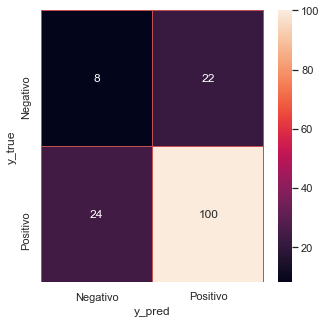

In [129]:
confusion(ytest, nb_pred)

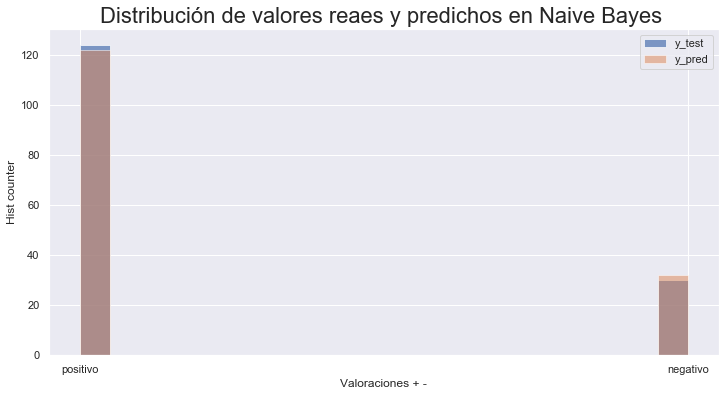

In [130]:
# Distribución de valores reales y predichos en random forest 

fig= plt.figure(figsize=(12,6))
plt.hist(ytest,bins=20, alpha=0.7, label = 'y_test')
plt.hist(nb_pred,bins=20, alpha=0.5, label = 'y_pred')

plt.xlabel('Valoraciones + -')
plt.ylabel('Hist counter')
plt.title('Distribución de precios test / pred')
plt.legend(loc='upper right')
plt.title('Distribución de valores reaes y predichos en Naive Bayes ', size=22)
plt.show()

<div style="padding: 10px 10px 10px 10px; background-color:lightgrey; color:black; text-align:left">
    <h4>Naive Bayes: Observaciones</h4>
    <p> <i>acc :  0.6504854368932039</i></p>
    <p> El modelo no parece ser lo suficientemente bueno para nuestras necesidades por 2 razones: </p>
    <ul>
        <li> A pesar de contar con una muestra sobre-representada de clases positivas, presenta alrededor de un 30% de error en la detección de comentarios de semejante clase.</li>
        <li> Y, por el lado de los comentarios negativos, presenta un preocupante distribución de errores al clasificar con una eficiencia menor al 50%.</li>
    </ul>
    <strong>Veremos qué sucede con otros modelos.</strong>
</div>

### `Random forest`

In [131]:
from sklearn.ensemble import RandomForestClassifier
#creación de modelo y entrenamiento
rf = RandomForestClassifier(n_estimators=100, max_features='sqrt', n_jobs=-1, oob_score = True, random_state = 42).fit(xtrain, ytrain)
print("acc : ", rf.score(xtest,ytest))

acc :  0.8181818181818182


In [132]:
#predicción
rf_pred = rf.predict(xtest)

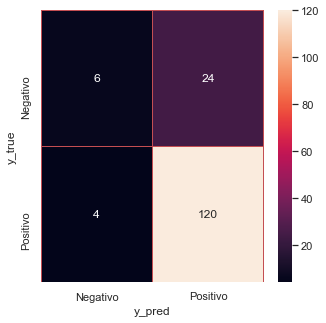

In [133]:
confusion(ytest, rf_pred)

In [ ]:
# Creamos un dataset para visualizar los features más importantes 

xtrain_df = pd.DataFrame(data = bag_of_words.toarray(), columns = count_tokens)
importances = rf.feature_importances_
columns = xtrain_df.columns
indices = np.argsort(importances)[230:-1]

plt.figure(figsize = (15,8))
sns.barplot(columns[indices], importances[indices])
plt.show()

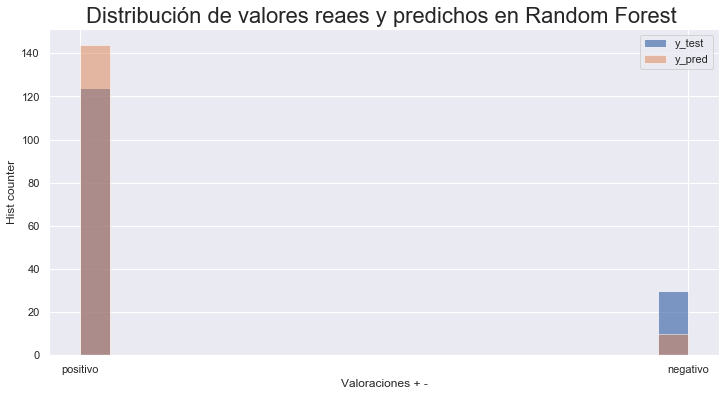

In [134]:
# Distribución de valores reales y predichos en random forest 

fig= plt.figure(figsize=(12,6))
plt.hist(ytest,bins=20, alpha=0.7, label = 'y_test')
plt.hist(rf_pred,bins=20, alpha=0.5, label = 'y_pred')

plt.xlabel('Valoraciones + -')
plt.ylabel('Hist counter')
plt.title('Distribución de precios test / pred')
plt.legend(loc='upper right')
plt.title('Distribución de valores reaes y predichos en Random Forest ', size=22)
plt.show()

<div style="padding: 10px 10px 10px 10px; background-color:lightgrey;color:black; text-align:left">
    <h4>Random Forest: Observaciones</h4>
    <p><i>acc :  0.8252427184466019</i></p>
    <p> El modelo no parece ser lo suficientemente bueno para nuestras necesidades por lo siguiente: </p>
    <ul>
        <li> Si bien posee casi un 100% de eficacia en la clasificación de clases positivas,</li>
        <li> Presenta una eficacia del 30% en la clasificación de muetras negativas.</li>
    </ul>
    <strong>Veremos qué sucede con otros modelos.</strong>
</div>

### `SVM`

In [135]:
from sklearn.svm import LinearSVC
svc = LinearSVC(C = 1)
svc.fit(xtrain, ytrain)
svc.score(xtest, ytest)

0.7662337662337663

In [136]:
svc_pred = svc.predict(xtest)

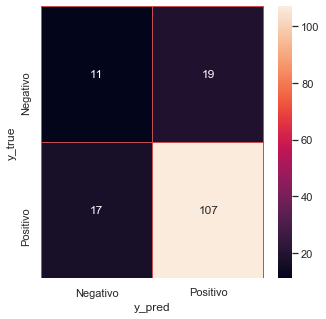

In [137]:
confusion(ytest, svc_pred)

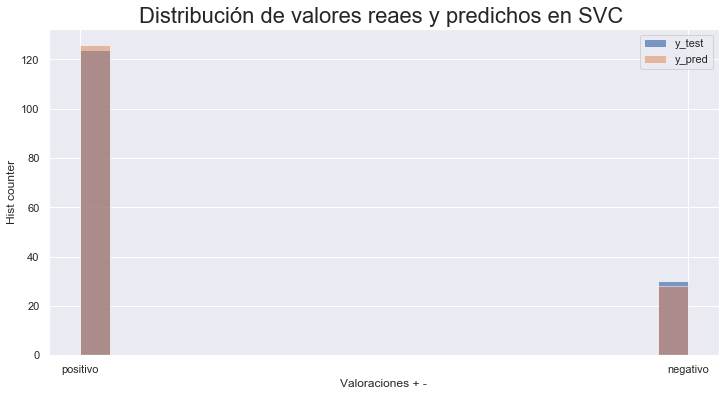

In [138]:
# Distribución de valores reales y predichos en random forest 

fig= plt.figure(figsize=(12,6))
plt.hist(ytest,bins=20, alpha=0.7, label = 'y_test')
plt.hist(svc_pred,bins=20, alpha=0.5, label = 'y_pred')

plt.xlabel('Valoraciones + -')
plt.ylabel('Hist counter')
plt.title('Distribución de precios test / pred')
plt.legend(loc='upper right')
plt.title('Distribución de valores reaes y predichos en SVC ', size=22)
plt.show()

<div style="padding: 10px 10px 10px 10px; background-color:lightgrey; text-align:left">
    <h4>SVC: Observaciones</h4>
    <p><i>acc :  0.7281553398058253</i></p>
    <p> El modelo no parece ser lo suficientemente bueno para nuestras necesidades por lo siguiente: </p>
    <ul>
        <li> Si bien posee un menor accuracy, es algo que podríamos aceptar en caso de demostrar una eficiencia equivalente en la correcta clasificación de clases tanto negativas como postivas. Sin embargo, no es el caso.</li>
    </ul>
    <strong>Veremos qué sucede con otros modelos.</strong>
</div>

### `XGB`

In [139]:
# Creación y entrenamiento de modelo
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators=250, max_depth=9).fit(xtrain, ytrain, eval_set=[(xtrain, ytrain), (xtest, ytest)],
        eval_metric=['error'])

[0]	validation_0-error:0.156863	validation_1-error:0.233766
[1]	validation_0-error:0.154062	validation_1-error:0.24026
[2]	validation_0-error:0.156863	validation_1-error:0.24026
[3]	validation_0-error:0.148459	validation_1-error:0.214286
[4]	validation_0-error:0.148459	validation_1-error:0.194805
[5]	validation_0-error:0.148459	validation_1-error:0.188312
[6]	validation_0-error:0.148459	validation_1-error:0.201299
[7]	validation_0-error:0.140056	validation_1-error:0.188312
[8]	validation_0-error:0.145658	validation_1-error:0.194805
[9]	validation_0-error:0.142857	validation_1-error:0.188312
[10]	validation_0-error:0.140056	validation_1-error:0.194805
[11]	validation_0-error:0.142857	validation_1-error:0.188312
[12]	validation_0-error:0.140056	validation_1-error:0.194805
[13]	validation_0-error:0.137255	validation_1-error:0.188312
[14]	validation_0-error:0.137255	validation_1-error:0.188312
[15]	validation_0-error:0.140056	validation_1-error:0.188312
[16]	validation_0-error:0.140056	val

In [140]:
xgb_pred = xgb.predict(xtest)

In [141]:
print('acc: ', accuracy_score(xgb_pred,ytest))

acc:  0.8246753246753247


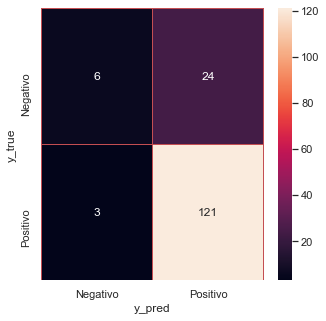

In [142]:
confusion(ytest, xgb_pred)

<div style="padding: 10px 10px 10px 10px; background-color:lightgrey; text-align:left">
    <h4>XGB: Observaciones</h4>
    <p><i>acc :  0.8058252427184466</i></p>
    <p> El modelo no parece ser lo suficientemente bueno para nuestras necesidades por lo siguiente: </p>
    <ul>
        <li> Como en los casos anteriores, no provee ninguna utilidad en la clasificación de muestras negativas.</li>
    </ul>
    <strong>Veremos qué sucede con otros modelos.</strong>
</div>

### `Cross Validation: XGB` 

In [143]:
from sklearn.model_selection import cross_validate,GridSearchCV
from sklearn.metrics import confusion_matrix , accuracy_score
clf=XGBClassifier()

In [144]:
params={"n_estimators":[67,70,100,120],'reg_lambda':[2,1],'gamma':[0,0.3,0.2,0.1]
       ,'eta':[0.06,0.05,0.04]
        ,"max_depth":[3,5],'objective':['binary:logistic']}

In [145]:
model=GridSearchCV(clf,params,cv=10,n_jobs=-1,verbose=1)
model.fit(xtrain,ytrain)

Fitting 10 folds for each of 192 candidates, totalling 1920 fits


GridSearchCV(cv=10, estimator=XGBClassifier(), n_jobs=-1,
             param_grid={'eta': [0.06, 0.05, 0.04], 'gamma': [0, 0.3, 0.2, 0.1],
                         'max_depth': [3, 5],
                         'n_estimators': [67, 70, 100, 120],
                         'objective': ['binary:logistic'],
                         'reg_lambda': [2, 1]},
             verbose=1)

In [146]:
model_pred=model.predict(xtest)

In [147]:
print('acc: ', accuracy_score(model_pred,ytest))
model.best_params_

acc:  0.8246753246753247


{'eta': 0.06,
 'gamma': 0,
 'max_depth': 3,
 'n_estimators': 67,
 'objective': 'binary:logistic',
 'reg_lambda': 1}

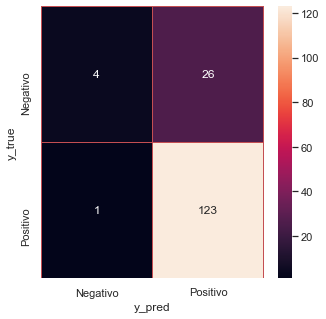

In [148]:
confusion(ytest, model_pred)

<div style="padding: 10px 10px 10px 10px; background-color:lightgrey;color:black; text-align:left">
    <h4>Cross Validation: Observaciones</h4>
    <p><i>acc :  0.8058252427184466</i></p>
    <p> El modelo no parece ser lo suficientemente bueno para nuestras necesidades por lo siguiente: </p>
    <ul>
        <li> Presenta la misma dificultad que todos los otros modelos.</li>
        <li> Pareciera, además, que las iteraciones del modelo reforzaron la sobre-representación de clases positivas favoreciendo el bias en el proceso general d la clasificación.</li>
    </ul>
    <strong>¿Qué podemos hacer en este escenario?</strong>
</div>

<hr></hr>
<div style="padding: 10px 10px 10px 10px; background-color:tomato; text-align:left">
    <h3>Observaciones</h3>
    <p> Todos los modelos presentan el mismo problema: incapacidad para clasificar correctamente ambas clases.</p>
    <p> El problema puede explicarse por las problemáticas previamente indetificadas en el proceso exploratorio: subrepresetnación de las clases negativas y similitud en el vocabulario de ambos tipos de muestras.</p>
    <hr/>
    <h4>El escollo</h4>
    <p>Como consecuencia, <strong> ninguno de los modelos sobrepasó el baseline de lo esperable: aproximadamente %80 de accuracy.</strong></p>
    <p>Sobrepasar ese baseline sería un indicio de éxito, pues nos aseguraría un mayor éxito en la clasificación acertada de muestras negativas. </p>
    <hr/>
    <h4>La propuesta</h4>
    <p>Intentaremos conseguir una mayor eficacia mediante la implementación de <strong>Oversampling Methods</strong>.</p>
    <p>La propuesta intentará crear una muestra sintética de clases negativas mediante de una estrategia de KNN.</p>
    <p>Para ello crearemos un modelo con <i>k = 5</i>, para lograr una variabilidad que no favorezca un sobreajuste del modelo.</p>
</div>

# RESAMPLING Methods

In [149]:
from imblearn.over_sampling import SMOTE

In [150]:
# Creamos las variables de entrenamiento
X = df_countvect
y = df['estado'].values

# Creamos el over-sampling mthod knn based
from imblearn.over_sampling import RandomOverSampler
sm = SMOTE(sampling_strategy='auto', k_neighbors=5, random_state=42)

# Generamos finalmente las nuevas variables de entrenamiento
x_res, y_res = sm.fit_resample(X, y)

# Generamos nuevo split
from sklearn.model_selection import train_test_split
xtrain2, xtest2, ytrain2, ytest2 = train_test_split(x_res, y_res,test_size=0.2,random_state=42,stratify=y_res)

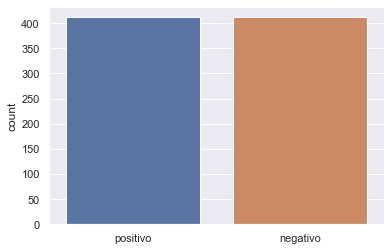

In [151]:
# Visualizamos la nueva distribución de muestras
sns.countplot(y_res)
plt.show()

<div style="padding: 10px 10px 10px 10px; background-color:bisque; color:black; text-align:center">
    <h3>¿Problema resuelto?</h3>
</div>

###  `Naive Bayes`

In [152]:
from sklearn.naive_bayes import GaussianNB
nb2 = GaussianNB()
nb2.fit(xtrain2,ytrain2)
print("acc : ", nb2.score(xtest2,ytest2))

acc :  0.8606060606060606


In [153]:
nb2_pred = nb2.predict(xtest2)

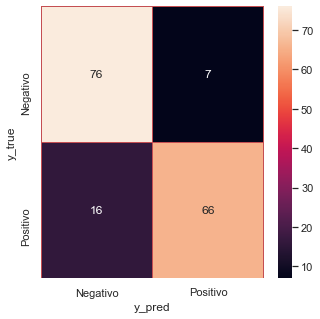

In [155]:
confusion(ytest2, nb2_pred)

<div style="padding: 10px 10px 10px 10px; color:black; background-color:lightgrey; text-align:left">
    <h4>Naive Bayes: Observaciones</h4>
    <p><i>OverSampling acc :  0.8606060606060606</i></p>
    <p> El modelo acrecienta su poder de prección, pero: </p>
    <ul>
        <li> Hay que notar que de los 83 especímenes de muestras negativas, clasifica correctamente 76. 76/83.</li>
        <li> Es notorio también que logra una mayor capacidad predictiva sobre las muestras positivas, siendo el único de los modelos que falló anteriormente en ese sentido.  </li>
        <li> <strong>Pero lo más valioso de todo es que notamos un decrecimiento tanto relativo y absoluto respecto del modelo anterior con sólo 20 muestras de testeo negativas. De esas 20 muestras negativas, el modelo clasificaba bien unas 9/20.   </strong></li>
        <li><strong> Entonces, podemos afirmar que en el pasaje de 11 a 7 muestras clasificadas erróneamente hay un crecimiento en el reconocimiento de muestras no sintéticas. Nuestro algoritmo ha mejorado. </strong></li>
    </ul>
    <strong>¿Qué sucede con los siguientes algoritmos?</strong>
</div>

### `Random Forest`

In [156]:
from sklearn.ensemble import RandomForestClassifier
#creación de modelo y entrenamiento
rf2 = RandomForestClassifier(n_estimators=100, max_features='sqrt', n_jobs=-1, oob_score = True, random_state = 42).fit(xtrain2, ytrain2)
print("acc : ", rf2.score(xtest2,ytest2))

acc :  0.8545454545454545


In [157]:
rf2_pred = rf2.predict(xtest2)

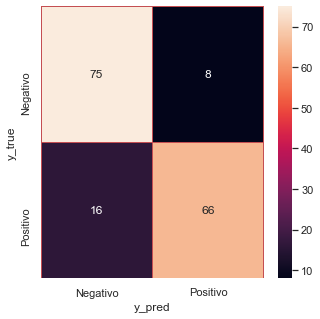

In [158]:
confusion(ytest2, rf2_pred)

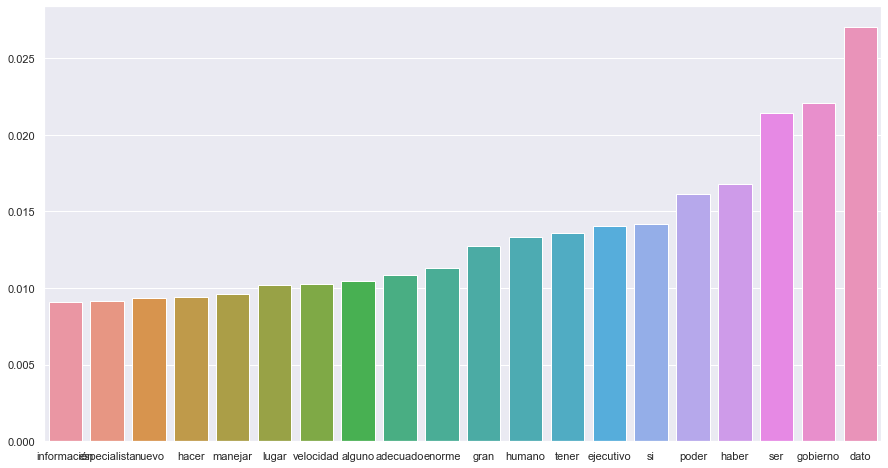

In [172]:
# Creamos un dataset para visualizar los features más importantes 

xtrain_df = pd.DataFrame(data = bag_of_words.toarray(), columns = count_tokens)
importances = rf.feature_importances_
columns = xtrain_df.columns
indices = np.argsort(importances)[280:300]

plt.figure(figsize = (15,8))
sns.barplot(columns[indices], importances[indices])
plt.show()

<div style="padding: 10px 10px 10px 10px;color:black; background-color:lightgrey; text-align:left">
    <h4>Random Forest: Observaciones</h4>
    <p><i>OverSampling acc :  0.8545454545454545</i></p>
    <p> El modelo mejora, pero: </p>
    <ul>
        <li> No es mejor que el Naive Bayes para detectar muestras negativas.</li>
    </ul>
    <strong>¿Qué sucederá con los otros modelos?</strong>
</div>

### `SVM`

In [159]:
from sklearn.svm import LinearSVC
svc2 = LinearSVC(C = 1)
svc2.fit(xtrain2, ytrain2)
svc2.score(xtest2, ytest2)

0.8181818181818182

In [160]:
svc2_pred = svc2.predict(xtest2)

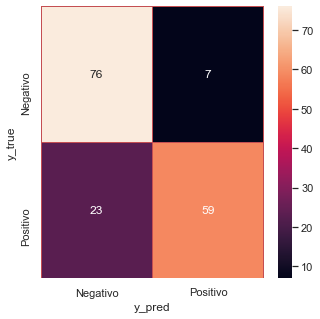

In [161]:
confusion(ytest2, svc2_pred)

<div style="padding: 10px 10px 10px 10px; color:black;background-color:lightgrey; text-align:left">
    <h4>SVM: Observaciones</h4>
    <p><i> OverSampling acc :  0.8181818181818182</i></p>
    <p> El modelo tiene el mismo rendimiento en reconocimiento de muestras negativas del Naive Bayes, pero: </p>
    <ul>
        <li> Falla mucho más en el reconocimiento de clases positivas.</li>
    </ul>
    <strong>¿Qué sucederá con los otros modelos?</strong>
</div>

### `XGB`

In [162]:
# Creación y entrenamiento de modelo
xgb2 = XGBClassifier(n_estimators=250, max_depth=9).fit(xtrain2, ytrain2, eval_set=[(xtrain2, ytrain2), (xtest2, ytest2)],
        eval_metric=['error'])

[0]	validation_0-error:0.248862	validation_1-error:0.315152
[1]	validation_0-error:0.212443	validation_1-error:0.290909
[2]	validation_0-error:0.212443	validation_1-error:0.290909
[3]	validation_0-error:0.221548	validation_1-error:0.309091
[4]	validation_0-error:0.197269	validation_1-error:0.284848
[5]	validation_0-error:0.182094	validation_1-error:0.242424
[6]	validation_0-error:0.185129	validation_1-error:0.236364
[7]	validation_0-error:0.182094	validation_1-error:0.224242
[8]	validation_0-error:0.172989	validation_1-error:0.224242
[9]	validation_0-error:0.174507	validation_1-error:0.230303
[10]	validation_0-error:0.162367	validation_1-error:0.236364
[11]	validation_0-error:0.165402	validation_1-error:0.230303
[12]	validation_0-error:0.159332	validation_1-error:0.224242
[13]	validation_0-error:0.156297	validation_1-error:0.224242
[14]	validation_0-error:0.150228	validation_1-error:0.224242
[15]	validation_0-error:0.15478	validation_1-error:0.218182
[16]	validation_0-error:0.150228	va

In [163]:
xgb2_pred = xgb.predict(xtest2)

In [164]:
print('acc: ', accuracy_score(xgb2_pred,ytest2))

acc:  0.6


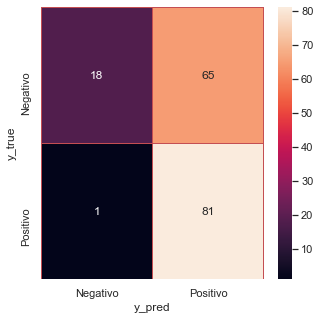

In [165]:
confusion(ytest2, xgb2_pred)

<div style="padding: 10px 10px 10px 10px; color:black;background-color:lightgrey; text-align:left">
    <h4>XGB: Observaciones</h4>
    <p><i>acc :  0.6</i></p>
    <p> El modelo empeora significativamente.</p>
    <strong>Veamos qué pasa con cross validation</strong>
</div>

### `Cross validation`

In [72]:
# xgb cross validation model
clf2=XGBClassifier()

In [73]:
params={"n_estimators":[67,70,100,120],'reg_lambda':[2,1],'gamma':[0,0.3,0.2,0.1]
       ,'eta':[0.06,0.05,0.04]
        ,"max_depth":[3,5],'objective':['binary:logistic']}

In [74]:
model2=GridSearchCV(clf2,params,cv=10,n_jobs=-1,verbose=1)
model2.fit(xtrain2,ytrain2)

Fitting 10 folds for each of 192 candidates, totalling 1920 fits


GridSearchCV(cv=10, estimator=XGBClassifier(), n_jobs=-1,
             param_grid={'eta': [0.06, 0.05, 0.04], 'gamma': [0, 0.3, 0.2, 0.1],
                         'max_depth': [3, 5],
                         'n_estimators': [67, 70, 100, 120],
                         'objective': ['binary:logistic'],
                         'reg_lambda': [2, 1]},
             verbose=1)

In [75]:
model2_pred=model2.predict(xtest2)

In [76]:
print(accuracy_score(model2_pred,ytest2))
model2.best_params_

0.8424242424242424


{'eta': 0.06,
 'gamma': 0.1,
 'max_depth': 5,
 'n_estimators': 120,
 'objective': 'binary:logistic',
 'reg_lambda': 1}

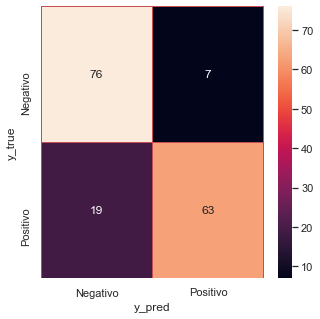

In [77]:
confusion(ytest2, model2_pred)

<div style="padding: 10px 10px 10px 10px; background-color:lightgrey;color:black; text-align:left">
    <h4>Cross Validation + XGB: Observaciones</h4>
    <p><i> OverSampling acc :  0.8424242424242424</i></p>
    <p> El modelo tiene el mismo rendimiento en reconocimiento de muestras negativas del Naive Bayes, pero: </p>
    <ul>
        <li> Falla un poco más en el reconocimiento de clases positivas.</li>
    </ul>
</div>

<hr></hr>
<div style="padding: 10px 10px 10px 10px; background-color:tomato; color:black; text-align:left">
    <h3>Corolarios</h3>
    <p> Con expcepcíón de XGB, los nuevos modelos entrenados con data sintética mejoraron significativamente el rendimiento en la correcta clasificaicón  (aunque el XGB con Cross Validation logrócasi tan buenos resultados como Naive Bayes).</p>
    <p>Sin embargo, aparece un nuevo problema detrás de una correlación fácilmente identificable: </p>
    <p>La eficacia en la clasificación de muestras negativas parece haber mejorado en la exacta misma proporción de la proporción de nuevas muestras sintéticas. Para los fines de a exhaustividad, me parece que es algo que podríamos dar por hecho.</p>
    <p><strong>Por ello, si diésemos por supuesto que los modelos clasificacan correctamente el 100% de las muestras sintéticas, tendríamos que establecer un baseline de rendimiento significativamente mayor al 80% respecto al accuracy de las muestras negativas de forma tal que nos aseguremos la estrategia de over-sampling nos ayuda con sustento y jsutificación.</strong></p>
    <p><strong>Esto último sucede en cierta medida con algunos de los últimos modelos. El que mejor resultados demuestra es el Naive Bayes</strong></p>
</div>

<hr/>

<div style="padding: 15px 15px 15px 15px; background-color:lightblue; color:black; text-align:left">
    <h1>Propuestas y próximos pasos</h1>
    <p>Cuento con una muestra de 3 mil valoraciones más que aún no han sido clasificadas.</p>
    <p>Teniendo en cuenta este detalle me gustaría implementar o al menos plantear el siguiente transcurso de investigación con el objeto de <strong>seguir mejorando nuestro algoritmo de clasificación</strong>:</p>
    <ul>
        <li>Ya sabemos que el punto más débil de nuestro algoritmo es su eficacia para clasificar muestras negativas. Esto se debe a 2 razones que pudimos identificar: sub-representación de muestras negativas clasificadas para entrenamiento del modelo y, en segundo lugar, la similitud del vocabulario presente entre ambos tipos de muestras. Tales aristas confluyen en la probabilida de que nuestros modelos tiendan a tener un rendimiento poco afortunado en el reconocimiento de muestras negativas. </li>
        <li>Pudimos, de todas maneras subsanar dicho problema mediante una estrategia de over-sampling, que nos permitió extender las capacidades predictivas el modelo:</li>
        <ul>
            <li>
                <strong>Antes del oversampling, el mejor rendimiento en el reconocimiento de clases negativas fue de 9/20, algo así como un 45% de eficacia. Desde entonces, ese es nuestro baseline a superar en la contrucción de nuevo modelo con los nuevos datos sintéticos.</strong> 
            </li>
            <li>
                <strong>Oversampling mediante, llegamos a una eficacia de 76/83, un poco más del 90% en el reconocimiento de clases negativas. </strong>
            </li>
            <li>Sin embargo, el modo en el que esto tiene que ser considerado, para ser del todo críticos y exhaustivos con el procedimiento implementado, es considerar cuántas de las muestras originales, no de las sintéticas, pasan a ser correctamente clasificadas con el nuevo modelo de datos 'oversampleados'.
            </li>
            <li>
                Desde esta perspectiva, nuestra mejor eficacia la encontramos en el modelo basado en Naive Bayes, con una eficacia de 76/83, donde sólo 7 muestras permanecen incorrectamente clasificadas. 
                <ul><li>Con este dato en este mente, podemos considerar, en lo que respecta a la capacidad predictiva de muestras negativas de los datos originales del <i>ytest</i>, una eficacia del 13/20 (recordando que en la muestra original nos quedaban 20 muestras negativas luego del train-split). </li>
                    <li><strong>Esto significa que nuestro baseline de mejoramiento del modelo pasa por superar una eficacia del 65% en el reconocimiento de muestras negativas</strong> (habiendo pasado de una eficacia no mayor al 45% de los modelos antes del oversampling).</li>
                </ul>
            </li>
        </ul>
            <h4>¿Cómo podemos superar dicho baseline?</h4>
        </ul>
    <hr/>
    
 
    
</div>


<div style="padding: 15px 15px 15px 15px; background-color:lightblue; color:black; text-align:left">
    <h3>Próximos pasos:</h3>
    <p><strong>Objetivo:</strong> Obtener más muestras negativas del dataset aún no clasificado haciendo uso del dataset aún no etiquetado (+ de 3 mil muestras). 
    </p>
    <p><strong>Metodología:</strong> </p>
    <ol>
        <li>Aplicamos el mismo proceso de normalización en nuestro dataset no etiquetado.</li>
        <ol>
            <li>Eliminamos las valoraciones de menos de x cantidad de palabras o caracteres</li>
            <li>Eliminamos stopwords</li>
            <li>Pasamos todo a minúsculas</li>
            <li>Toekenizamos</li>
            <li>Vectorizamos</li>
            <li>Contruímos nuevo bag of word, en lo que será el nuevo <strong><i>xtest</i></strong></li>
        </ol>
        <li>Usamod los datos de testeo para obtener nueva predicción/clasificación.</li>
        <li>Obtenemos nuevas muestras clasificadas a partir de la predicción.</li>
        <li>Validación cruzada de tales muestras mediante input humano (sólo algunas).</li>
        <li>Forjamos nuevos modelos con la combinación de las muestras previamente clasificadas y de las ahora clasificadas.</li>
        <li>Evualación de rendimiento de los mejores modelos y muestras de entrenamiento.</li>
        <li>Comprobamos si podemos superar el baseline de 65% de accuracy en clasificación de muestras negativas </li>
        <li>Evaluación de próximos pasos.</li>
    </ol>
</div>
    

In [173]:
##########################
# SAVE-LOAD using joblib #
##########################
from joblib import dump, load

In [174]:
# SAVE
dump(nb2, 'nb.joblib') 

['nb.joblib']